***Reading the data***

In [58]:
# libraries 
# for data processing
import pandas as pd  # for reading and analyzing the data
#for  visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
#to split data into training and testing 
from sklearn.model_selection import train_test_split
##feature selection 
from sklearn.feature_selection import mutual_info_classif # attribute selection method 1
##classifications
from sklearn.linear_model import LogisticRegression #clf1
from sklearn.tree import DecisionTreeClassifier #clf2
from sklearn.neighbors import KNeighborsClassifier#clf3
from sklearn import svm #clf4
from sklearn.neural_network import MLPClassifier#clf5
#accuracy measurement
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report
from sklearn import metrics
#data transformation 
from sklearn import preprocessing





In [4]:
# saving as df 
df= pd.read_csv("dataClean.csv", index_col = False)
df.head()

,x.aidtst3,employ1,income2,weight2,height3,children,veteran3,blind,renthom1,sex1,...,x.denvst3,x.prace1,x.mrace1,x.exteth3,x.asthms1,x.michd,x.ltasth1,x.casthm1,x.state,havarth3
0,2.0,1.0,8.0,138.0,504.0,2.0,2.0,2.0,1.0,2,...,1,1,1,1,3,2.0,1,1,27,2
1,1.0,1.0,4.0,240.0,507.0,88.0,2.0,1.0,2.0,1,...,2,1,1,2,3,2.0,1,1,72,2
2,1.0,1.0,6.0,120.0,504.0,88.0,2.0,2.0,1.0,2,...,1,6,6,2,3,2.0,1,1,31,2
3,2.0,7.0,77.0,133.0,502.0,88.0,2.0,2.0,1.0,2,...,1,1,1,2,3,2.0,1,1,45,2
4,9.0,7.0,8.0,170.0,505.0,88.0,2.0,2.0,1.0,2,...,1,1,1,1,3,2.0,1,1,24,2


In [5]:
X= df.loc[ :,  ~df.columns.isin(['havarth3']) ]
y = df.loc[:, 'havarth3':'havarth3']

In [6]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33 ,random_state = 42)
print("original data size ", df.shape)
print("training data size", X_train.shape)
print("testing data size ", X_test.shape)
# print(X_train.head())

original data size  (11933, 108)
training data size (7995, 107)
testing data size  (3938, 107)


In [45]:
# X_train_csv= X_train
# X_train_csv["target"]= y_train
# X_train_csv.to_csv("X_train.csv")

In [7]:
import numpy as np
categ_data =[]
numeric_data = []
X_train_col = X_train.columns.to_list()
for column in X_train_col:
    unique_values = len(X_train[column].value_counts())
    if unique_values < 10:
        categ_data.append(column)
    else:
        numeric_data.append(column)
print("categorical data")    
print(categ_data)
print("numeric data")
print(numeric_data)

categorical data
['x.aidtst3', 'employ1', 'veteran3', 'blind', 'renthom1', 'sex1', 'marital', 'educa', 'deaf', 'decide', 'x.drnkdrv', 'flushot6', 'seatbelt', 'hivtst6', 'hivrisk5', 'pneuvac4', 'diffwalk', 'usenow3', 'diffdres', 'diffalon', 'smoke100', 'rmvteth4', 'lastden4', 'diabete3', 'hlthpln1', 'genhlth', 'dispcode', 'chckdny1', 'iyear', 'persdoc2', 'medcost', 'checkup1', 'exerany2', 'chcocncr', 'chccopd1', 'addepev2', 'chcscncr', 'asthma3', 'cvdstrk3', 'cvdinfr4', 'cvdcrhd4', 'qstver', 'qstlang', 'x.metstat', 'x.bmi5cat', 'x.age.g', 'x.raceg21', 'x.race.g1', 'x.age65yr', 'x.rfbmi5', 'x.chldcnt', 'x.educag', 'x.incomg', 'x.rfdrhv6', 'x.rfseat2', 'x.rfseat3', 'x.rfbing5', 'x.smoker3', 'x.rfsmok3', 'drnkany5', 'x.racegr3', 'x.race', 'x.urbstat', 'x.chispnc', 'x.rfhlth', 'x.dualuse', 'x.imprace', 'x.hispanc', 'x.phys14d', 'x.ment14d', 'x.hcvu651', 'x.totinda', 'x.denvst3', 'x.prace1', 'x.mrace1', 'x.exteth3', 'x.asthms1', 'x.michd', 'x.ltasth1', 'x.casthm1']
numeric data
['income2', '

In [8]:
numeric_var = ["weight2","height3","children","alcday5","x.psu","physhlth","menthlth","sleptim1","htin4","wtkg3","x.bmi5","htm4","x.drnkwek","drocdy3.","x.llcpwt2","x.llcpwt","x.wt2rake","x.ststr"
,"x.strwt","x.rawrake"]

categorical = X_train.loc[:, ~X_train.columns.isin(numeric_var)].columns.to_list()


In [9]:
list(set(numeric_data) - set(numeric_var))

['fmonth', 'x.ageg5yr', 'iday', 'income2', 'imonth', 'x.age80', 'x.state']

We have have only above differences. We know that dates are not count as numeric and ranges, state number not a numeric variable.We are now sure that our data is correct. 

-----------------------------------------------

**----------------------------------------------------Iteration One-------------------------------------------------**

**Attribute Selection Method : Information Gain/Mutual Information**

First attribute selection method is Information Gain/Mutual Information. This is a filtering method. It means we will use univariate statistics to pick our attributes and filter them based on their information gain. We will only select the ones with high information gain. 

In [13]:
# takes df, return to df 
def mutualInfo(X_train, y_train, X_test):
    #initating the mututal info object
    mutual_info = mutual_info_classif(X_train, y_train.values.ravel(), random_state=42)
    #coverting to series
    mutual_info = pd.Series(mutual_info)
    #renaming index with column names
    mutual_info.index = X_train.columns
    #sorting
    mutual_info.sort_values(ascending=False)
    #mutual_info.between(0.1,1 ) because we do not want the one that has zero rate
    #filtering the data with only selected attributes
    mutual_info[mutual_info.between(0.01,1 )].sort_values(ascending=False).plot.bar(figsize=(8, 8))
    X_train_20= X_train[mutual_info[mutual_info.between(0.01,1 )].sort_values(ascending=False)[0:20].index.to_list()]
    X_test_20 = X_test[mutual_info[mutual_info.between(0.01,1 )].sort_values(ascending=False)[0:20].index.to_list()]
    return X_train_20, X_test_20


new size X_train (7995, 20)
new size X_train (3938, 20)
selected column names Index(['x.age80', 'x.ageg5yr', 'x.age.g', 'employ1', 'diffwalk', 'x.hcvu651',
       'genhlth', 'x.age65yr', 'marital', 'x.phys14d', 'physhlth', 'rmvteth4',
       'pneuvac4', 'x.rfhlth', 'x.ststr', 'x.exteth3', 'persdoc2', 'qstver',
       'x.strwt', 'chccopd1'],
      dtype='object')


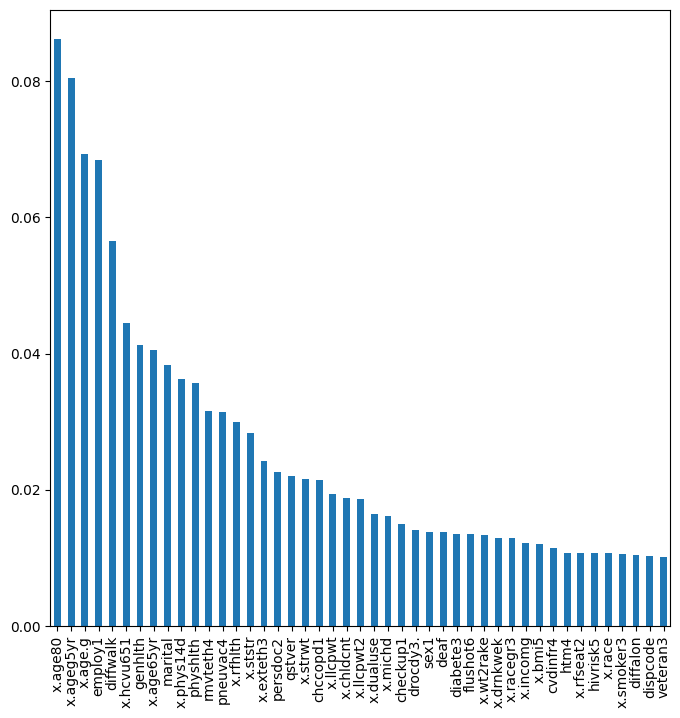

In [14]:
# reduced data set 1
X_train_reduced1 , X_test_reduced1= mutualInfo(X_train, y_train, X_test)
print("new size X_train",X_train_reduced1.shape )
print("new size X_train",X_test_reduced1.shape )
print("selected column names",X_test_reduced1.columns)

**Model Creation : Initializing 5 models**

**Classifier  1- Logistic Regression**

In [51]:
def lRMaker(X_train, y_train, X_test):
    # instantiate the model (using the default parameters)
    m = LogisticRegression(random_state=0) # initialize lr
    m.fit(X_train,y_train.values.ravel())# fit the training data to train the data
    y_pred = m.predict(X_test) # use test data to predict
    return m, y_pred
    

In [52]:
def printAccuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TP, FP, FN, TN = cm.ravel() 
    group_names = ["TP", "FP", "FN", "TN"]
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='mako')
    P = TP+FP
    N= FN+ TN
    TPR_log = TP/P
    TNR_log = TN /N 

    my_accuracy_score_log= accuracy_score(y_test, y_pred)
    my_matrix_values_1 = {"TN":TN, "FP":FP, "FN":FN, "TP":TP,"Accuracy":my_accuracy_score_log,
                      "Sensitivity: TPR":TPR_log,"Specificity: TNR":TNR_log}
    result_of_m = pd.DataFrame(my_matrix_values_1 , index=[0])
    print(result_of_m)
    #return my_accuracy_score_log
    print('Log loss = {:.5f}'.format(log_loss(y_test, y_pred)))
    print('AUC = {:.5f}'.format(roc_auc_score(y_test, y_pred)))
    print('Average Precision = {:.5f}'.format(average_precision_score(y_test, y_pred)))
    print('\nUsing 0.5 as threshold:')
    print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision = {:.5f}'.format(precision_score(y_test, y_pred)))
    print('Recall = {:.5f}'.format(recall_score(y_test, y_pred)))
    print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred)))
    print('\nClassification Report')
    print(classification_report(y_test, y_pred))
    print("Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.")
    return result_of_m


***Model 1***

In [26]:
m1_lr, m1_y_pred_lr= lRMaker(X_train=X_train_reduced1, y_train=y_train, X_test=X_test_reduced1)

     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2212  785  418  523  0.694515          0.399847          0.841065
Log loss = 11.97184
AUC = 0.62046
Average Precision = 0.29001

Using 0.5 as threshold:
Accuracy = 0.69451
Precision = 0.55579
Recall = 0.39985
F1 score = 0.46510

Classification Report
              precision    recall  f1-score   support

           1       0.56      0.40      0.47      1308
           2       0.74      0.84      0.79      2630

    accuracy                           0.69      3938
   macro avg       0.65      0.62      0.63      3938
weighted avg       0.68      0.69      0.68      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


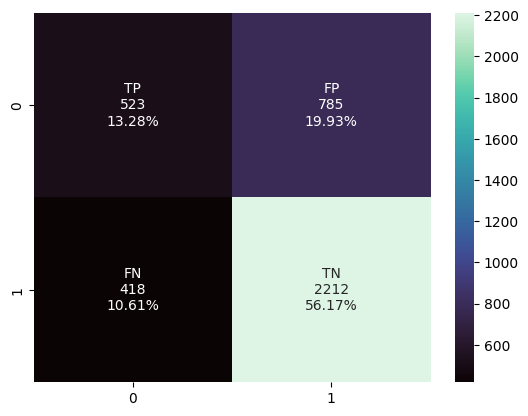

In [28]:
m1_lr_result = printAccuracy(y_test, m1_y_pred_lr)

***Classifier 2-Decision Tree Classifier***

***Model 2***

In [38]:
def dTMaker(X_train, y_train, X_test):
    #max_depth to control the size of the tree to prevent overfitting
    m = DecisionTreeClassifier(max_depth=3, random_state=42)
    m = m.fit(X_train, y_train.values.ravel())
    y_pred = m.predict(X_test)
    return m , y_pred

In [39]:
m2_dt, m2_y_pred_dt  = dTMaker (X_train=X_train_reduced1, y_train=y_train, X_test=X_test_reduced1)

     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2276  652  354  656   0.74454          0.501529          0.865399
Log loss = 11.97184
AUC = 0.68346
Average Precision = 0.27758

Using 0.5 as threshold:
Accuracy = 0.74454
Precision = 0.64950
Recall = 0.50153
F1 score = 0.56601

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.50      0.57      1308
           2       0.78      0.87      0.82      2630

    accuracy                           0.74      3938
   macro avg       0.71      0.68      0.69      3938
weighted avg       0.73      0.74      0.73      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


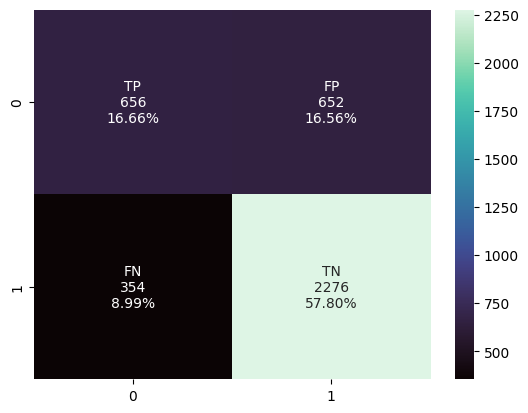

In [40]:
# printing dt result 
m2_dt_result = printAccuracy(y_test, m2_y_pred_dt)

***Model 3 : K-Nearest Neighbors Classifier (KNN)***

In [53]:
def kNNMaker(X_train,y_train,X_test):
    scaler =preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled= scaler.transform(X_test)
    m = KNeighborsClassifier(n_neighbors=9)
    m.fit(X_train_scaled, y_train.values.ravel())
    y_pred_knn= m.predict(X_test_scaled)
    return m , y_pred_knn

In [44]:
m3_knn, m3_y_pred_knn  = kNNMaker(X_train=X_train_reduced1, y_train=y_train, X_test=X_test_reduced1)

     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2203  627  427  681  0.732351          0.520642          0.837643
Log loss = 11.97184
AUC = 0.67914
Average Precision = 0.27913

Using 0.5 as threshold:
Accuracy = 0.73235
Precision = 0.61462
Recall = 0.52064
F1 score = 0.56374

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.52      0.56      1308
           2       0.78      0.84      0.81      2630

    accuracy                           0.73      3938
   macro avg       0.70      0.68      0.69      3938
weighted avg       0.72      0.73      0.73      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


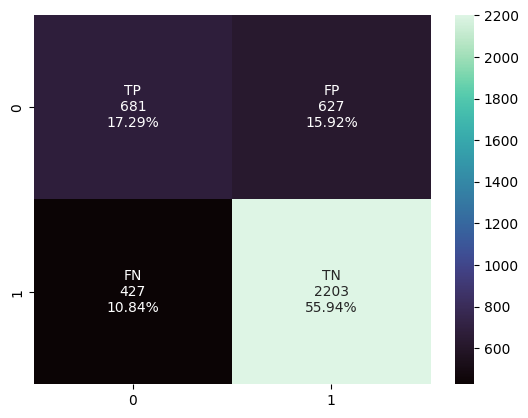

In [54]:
m3_knn_result = printAccuracy(y_test, m3_y_pred_knn)

***Classifier 4 : Support vector machine (SVM)***

In [55]:
def sVMMaker(X_train,y_train,X_test ):
    scaler =preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled= scaler.transform(X_test)
    m= svm.SVC(random_state=0)
    m = m.fit(X_train_scaled, y_train.values.ravel())
    y_pred_svm= m.predict(X_test_scaled)
    return m, y_pred_svm

***Model 4***

In [56]:
m4_svm, m4_y_pred_svm  = sVMMaker(X_train=X_train_reduced1, y_train=y_train, X_test=X_test_reduced1)

     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2351  690  279  618  0.753936          0.472477          0.893916
Log loss = 11.97184
AUC = 0.68320
Average Precision = 0.27663

Using 0.5 as threshold:
Accuracy = 0.75394
Precision = 0.68896
Recall = 0.47248
F1 score = 0.56054

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.47      0.56      1308
           2       0.77      0.89      0.83      2630

    accuracy                           0.75      3938
   macro avg       0.73      0.68      0.69      3938
weighted avg       0.75      0.75      0.74      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


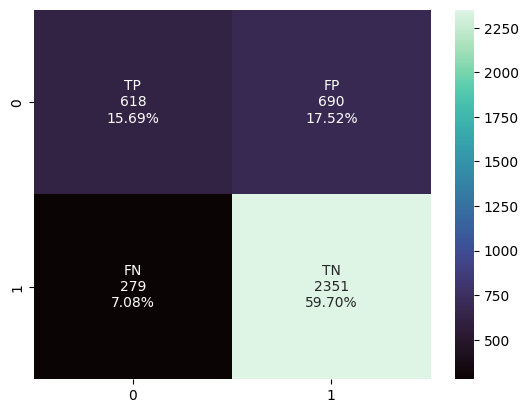

In [57]:
m4_svm_result = printAccuracy(y_test, m4_y_pred_svm)

***Classifier 5: neural_network.MLPClassifier***

In [59]:
def mLPMaker(X_train,X_test, y_train):
    scaler =preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled= scaler.transform(X_test)
    m = MLPClassifier(random_state=0, max_iter=1).fit(X_train_scaled, y_train.values.ravel())
    y_pred_mlp= m.predict(X_test_scaled)
    return m, y_pred_mlp


In [60]:
m5_mlp , m5_y_pred_mlp  = mLPMaker(X_train=X_train_reduced1, y_train=y_train, X_test=X_test_reduced1)

/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2302  681  328  627  0.743779          0.479358          0.875285
Log loss = 11.97184
AUC = 0.67732
Average Precision = 0.27808

Using 0.5 as threshold:
Accuracy = 0.74378
Precision = 0.65654
Recall = 0.47936
F1 score = 0.55413

Classification Report
              precision    recall  f1-score   support

           1       0.66      0.48      0.55      1308
           2       0.77      0.88      0.82      2630

    accuracy                           0.74      3938
   macro avg       0.71      0.68      0.69      3938
weighted avg       0.73      0.74      0.73      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


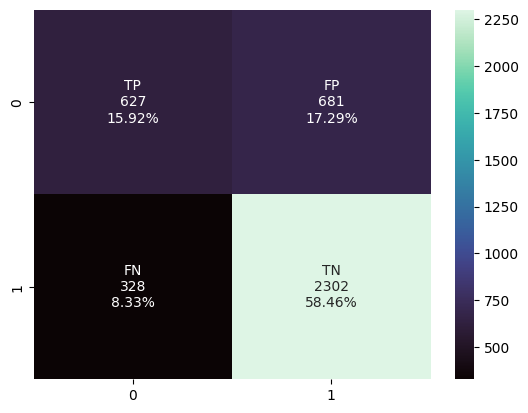

In [63]:
m5_mlp_result = printAccuracy(y_test, m5_y_pred_mlp)

------------------------------------------------- End of iteration 1------------------------------------------

------------------------------------------------------------------ Iteration 2 -----------------------------------------------

In [ ]:
# from sklearn.feature_selection import SelectKBest
# select_twenty_cols = SelectKBest(mutual_info_classif, k=20)
# train_twenty = select_twenty_cols.fit_transform(X_train, y_train.values.ravel())
# print(X_train.columns[select_twenty_cols.get_support()])
# X_train_20 = select_twenty_cols.transform(X_train)
# X_train_20 = X_train.iloc[ :, select_twenty_cols.get_support()]
# X_test_20 = select_twenty_cols.transform(X_test)
# X_test_20  = X_test.iloc[ :, select_twenty_cols.get_support()]

# print("Train data length", X_train.shape)
# print("After attribute reduction", X_test_20.shape)
# print(X_test_20.head())

# new_df= X_train.iloc[ :, select_twenty_cols.get_support()]
# new_df.head()

## Model creation

## Logistic Regretion 

In [ ]:
# from sklearn.metrics import accuracy_score
# # import the class
# from sklearn.linear_model import LogisticRegression
# # instantiate the model (using the default parameters)
# m1_log = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0) # intiate the log reg
# m1_log.fit(X_train_20,y_train.values.ravel())# fit the training data to train the data
# y_pred = m1_log.predict(X_test_20) # use test data to predict
# accuracy_m1 = accuracy_score(y_test, y_pred)
# round(accuracy_m1,2)

In [ ]:
def dropFeatureAccr(x_train,x_test, y_train, y_test):
    accuracy_featuresDrop = []
    column_name= list(x_train.columns.values.tolist())
    for column in range(len(column_name)):
        #print("test", column_name[column])
        name_col= column_name[column]
        x_train_modified =  x_train.loc[:, ~x_train.columns.isin([name_col]) ]
        x_test_modified =  x_test.loc[:, ~x_test.columns.isin([name_col]) ]
        clf = LogisticRegression(solver='lbfgs', max_iter=5000) 
        clf.fit(x_train_modified,y_train.values.ravel())
        y_pred_mod = clf.predict(x_test_modified)
        accuracy_featuresDrop.append(accuracy_score(y_test,y_pred_mod))      
    dictionary_feature_drop = dict(zip(column_name, accuracy_featuresDrop))
    return dictionary_feature_drop

logisticRegDrop =dropFeatureAccr(x_train= X_train_20,y_train= y_train, x_test= X_test_20, y_test = y_test) 
print(logisticRegDrop)
print("max effect ")
print("feature", max(logisticRegDrop, key=logisticRegDrop.get))
print("accuracy score ", logisticRegDrop.get(max(logisticRegDrop, key=logisticRegDrop.get)))
print("when we drop it the accurasy score went down effect")
print("feature",min(logisticRegDrop, key=logisticRegDrop.get))
print("accuracy score ", logisticRegDrop.get(min(logisticRegDrop, key=logisticRegDrop.get)))


# lists = logisticRegDrop.items() # sorted by key, return a list of tuples

# # x, y = zip(*lists) # unpack a list of pairs into two tuples

# # plt.plot(x, y)
# # plt.xticks(x,[0,1,2,3,4,5,6,7,8,9,10])
# # plt.show()

In [ ]:
print(X_train_20.columns)
x_train_modified = X_train_20.drop(columns=['x.ageg5yr','x.age.g', "x.ststr"])
x_test_modified = X_test_20.drop(columns=[ 'x.ageg5yr', 'x.age.g',"x.ststr", ])
print("train", x_train_modified.shape)
print("test", x_train_modified.shape)
m2 = LogisticRegression(solver='lbfgs', max_iter=5000, random_state=0)
m2.fit(x_train_modified,y_train.values.ravel())
y_pred_mod_2 = m2.predict(x_test_modified)
accuracy_score(y_test,y_pred_mod_2)  

***Decision Tree Classifier Model***

In [ ]:

# max_depth to control the size of the tree to prevent overfitting
m2_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
cm2_dt = m2_dt.fit(X_train_20, y_train)
y_pred_dt = cm2_dt.predict(X_test_20)
accuracy_dt = accuracy_score(y_test,y_pred_dt) 
accuracy_dt
# from sklearn import tree
# tree.plot_tree(cm2_dt)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics

scaler =preprocessing.StandardScaler().fit(X_train_20)
X_train_scaled = scaler.transform(X_train_20)
X_test_scaled= scaler.transform(X_test_20)
m3 = KNeighborsClassifier(n_neighbors=9)
m3.fit(X_train_scaled, y_train.values.ravel())
y_pred_knn= m3.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test,y_pred_knn) 
accuracy_knn


## SVM

In [ ]:


m4_svm= svm.SVC(random_state=0)
m4_svm = m4_svm.fit(X_train_scaled, y_train.values.ravel())
y_pred_svm= m4_svm.predict(X_test_scaled)
accuracy_svm  = accuracy_score(y_test,y_pred_svm) 
accuracy_svm 

## neural_network.MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

m5_mlp = MLPClassifier(random_state=0, max_iter=1).fit(X_train_scaled, y_train.values.ravel())
y_pred_mlp= m5_mlp.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test,y_pred_mlp) 
accuracy_mlp

---------------------------------- Iteration II ----------------------------

## Feature selection : ANOVA F-value

### numeric feature selection 

In [ ]:
# from sklearn.feature_selection import f_classif 
# select = f_classif(new_df, y_train.values.ravel())
# select_numeric = pd.Series(select[0])
# select_numeric.index = new_df.columns
# select_numeric.sort_values(ascending=False)



In [ ]:
from sklearn.feature_selection import f_classif 
from sklearn.feature_selection import SelectKBest
new_df= X_train[numeric_var]
sel_five_cols = SelectKBest(f_classif, k=10)
sel_five_cols.fit(new_df, y_train.values.ravel())
new_df.columns[sel_five_cols.get_support()].to_list()

In [ ]:
Colnames_numeric = new_df.columns[sel_five_cols.get_support()].to_list()
Colnames_numeric

categorical selection 

In [ ]:
from sklearn.feature_selection import chi2
X_cat = X_train.loc[:,  ~X_train.columns.isin(numeric_var) ]
f_p_values=chi2(X_cat,y_train)
p_values=pd.Series(f_p_values[1])
p_values.index=X_cat.columns
p_values.sort_index(ascending=False).index.to_list()



In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(score_func=chi2, k=10)

sel_five_cols.fit(X_cat, y_train.values.ravel())
categorical_features = X_cat.columns[sel_five_cols.get_support()].to_list()

In [ ]:
my_columns = categorical_features+ Colnames_numeric

my_columns

In [ ]:
X_train_A2_num = X_train[my_columns]
X_test_A2_num = X_test[my_columns]
len(X_test_A2_num.columns)


In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
m2_log = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0) # intiate the log reg
m2_log.fit(X_train_A2_num,y_train.values.ravel())# fit the training data to train the data
y_pred_m2_log = m2_log.predict(X_test_A2_num) # use test data to predict
accuracy_m2_log = accuracy_score(y_test, y_pred_m2_log)
round(accuracy_m2_log,2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
scaler =preprocessing.StandardScaler().fit(X_train_A2_num)
print(X_train_A2_num.shape)
print(X_test_A2_num.shape)
X_train_scaled_2 = scaler.transform(X_train_A2_num)
X_test_scaled_2 = scaler.transform(X_test_A2_num)
print(X_train_scaled_2.shape)
print(X_test_scaled_2.shape)
m3_2 = KNeighborsClassifier(n_neighbors=9)
m3_2.fit(X_train_scaled_2, y_train.values.ravel())
y_pred_m3_2= m3_2.predict(X_test_scaled_2)
accuracy_m3_2 = accuracy_score(y_test, y_pred_m3_2)
round(accuracy_m3_2,2)

sequential feature selection method 

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)

sfs1 = SFS(model, 
           k_features=7, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)

sfs1 = sfs1.fit(X_train, y_train.values.ravel())

In [ ]:
sfs1.k_feature_names_

In [ ]:
sfs1.k_score_

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
metric_dict = sfs1.get_metric_dict(confidence_interval=0.95)
fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [ ]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier


model2 = KNeighborsClassifier(n_neighbors=5)

model2.fit(X_train_std, y_train)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


sfs2 = SFS(model2, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs=-1,
           cv=5)


sfs2 = sfs2.fit(X_train_std, y_train.values.ravel())

In [ ]:
sfs2.k_feature_names_
sfs2.k_feature_idx_
sfs2.k_score_

In [ ]:
pd.DataFrame.from_dict(sfs2.get_metric_dict()).T

In [ ]:
from sklearn.ensemble import RandomForestClassifier

sfs_rf = SFS(RandomForestClassifier(n_estimators=100, random_state=0),
          k_features =4,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 5,
          n_jobs= -1
         ).fit(X_train, y_train.values.ravel())

In [ ]:

sfs_rf.k_feature_names_
# sfs_rf.k_feature_idx_
sfs_rf.k_score_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
rm = RandomForestClassifier(n_estimators=100, random_state=0)
rm.fit(X_train, y_train)
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=0))
sel.fit(X_train, y_train)

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

In [ ]:
feature_scores = pd.Series(rm.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.

In [ ]:
import seaborn as sns
numer_corr = X_train[numeric_var].corr()
corr_pairs = numer_corr.unstack()
corr_pairs
# print(corr_pairs.sort_values()[0:10])

# sorted_pairs =corr_pairs.sort_values()

In [ ]:
from sklearn.feature_selection import chi2
X_categorical= X_train.loc[ :,  ~X_train.columns.isin(numeric_var)]
f_p_values=chi2(X_categorical,y_train)

In [ ]:
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5) & (abs(sorted_pairs)<1)].sort_values()
strong_pairs
strong_pairs.values
strong_pairs_df = strong_pairs.to_frame()
strong_pairs_df = strong_pairs_df.rename(columns = {0:'corr'})

strong_pairs_df.reset_index(inplace=True)
strong_pairs_df.columns
strong_pairs_df = strong_pairs_df.rename(columns = {'level_0':'var1','level_1':'var2' })
print(strong_pairs_df["var2"].unique())
print(strong_pairs_df["var1"].unique())

strong_pairs_df
    

In [ ]:
strong_pairs_df.to_csv("correlated.csv")

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()# creating the matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [ ]:

corr_features = correlation(X_train[numeric_var], 0.7)
corr_features

In [ ]:
from sklearn.feature_selection import chi2
X_categorical= X_train.loc[ :,  ~X_train.columns.isin(numeric_var)]
f_p_values=chi2(X_categorical,y_train)
X_categorical.shape

In [ ]:
import pandas as pd
# highier the p value lower the importance
# A p-value less than 0.05 is typically considered to be statistically significant
p_values=pd.Series(f_p_values[1])
p_values.index=X_categorical.columns
p_values.sort_values(ascending=False, inplace=True)
column_name= p_values.index.to_list()
values= p_values.values.tolist()
data= pd.DataFrame(data=values,columns=['p_values'] ) # 0000001
data["featureNames"] = column_name
# this will eliminate our features to 20
cat= data[data["p_values"]>0.00000000000000000000000001].featureNames.to_list()
len(cat)

In [ ]:
p_values.plot.bar()

In [ ]:
X_categorical = X_train.loc[ :,  ~X_train.columns.isin(numeric_var)]
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 15)
X_kbest_features = chi2_features.fit_transform(X_categorical, y_train)
  
# Reduced features
print('Original feature number:', X_categorical.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])
X_categorical.columns[chi2_features.get_support()].to_list()

In [ ]:

corr_features
dropped_features = list(corr_features)
print(len(cat))

In [ ]:
X_train_dropped = X_train.loc[ :,  ~X_train.columns.isin(dropped_features) ]
X_test_dropped = X_test.loc[ :,  ~X_test.columns.isin(dropped_features) ]
print("original",X_train.shape)
print("original",X_train_dropped.shape )
# categorical elimination
X_train_dropped_2 = X_train_dropped.loc[ :,  ~X_train_dropped.columns.isin(cat) ]
X_test_dropped_2 = X_test_dropped.loc[ :,  ~X_test_dropped.columns.isin(cat) ]

In [ ]:
print("new size",X_train_dropped_2.shape )
print("new size",X_test_dropped_2.shape )

In [ ]:
X_train_dropped_2.columns

In [ ]:
# k_range = range(1,30)
# scores= {}
# scores_list = []
# for k in k_range:
#     knn= KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train_scaled, y_train.values)
#     y_pred_knn = knn.predict(X_test_scaled)
#     scores[k]= accuracy_score(y_test, y_pred_knn) 
#     # scores[k]= metrics.accuracy_score(y_test, y_pred_knn)
#     # print()

# test_df = X_test
# test_df['havarth3']= y_test
# test_df.to_csv("training.csv")
# training_df = X_train
# training_df['havarth3']= y_train
# training_df.to_csv("training.csv")

# numeric_variable_summary = df[numeric_var]
# df_target = df["havarth3"]
# df_target.unique()

# profile = ProfileReport(numeric_variable_summary, title="Pandas_Profiling_Report")
# profile

# profile.to_file("your_report.html")

# cor_matrix = numeric_variable_summary.corr().abs()
# cor_matrix

# import numpy as np
# upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# print(upper_tri)
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
# print(to_drop)

#let's plot the ordered mutual_info values per feature
#mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

# from sklearn.feature_selection import SelectKBest
# #No we Will select the  top 5 important features
# sel_five_cols = SelectKBest(mutual_info_classif, k=30)
# sel_five_cols.fit(X_train, y_train)
# X_train.columns[sel_five_cols.get_support()]

# from sklearn.feature_selection import chi2
# X_cat = X_train.loc[ :,  ~X_train.columns.isin(numeric_var) ]
# y = y_train
# chi2_features = SelectKBest(chi2, k=30)
# X_kbest_features = chi2_features.fit_transform(X_cat, y)

# print('original feature number', X_cat.shape[1])
# print('reduced feature number', X_kbest_features.shape[1])
# print("best features ", X_cat.columns[chi2_features.get_support()])